In [463]:
# IMPORTS AND SETTINGS

import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from random import randint, seed
import seaborn
from sklearn.cluster import KMeans
from sklearn.metrics import rand_score, mean_squared_error
from sklearn.preprocessing import scale
from time import time
pd.set_option('display.expand_frame_repr', False)

In [464]:
# QUESTION 1: SET UP DATAFRAME
df = pd.read_csv(
    '../assignment/question_1_data/cleaned_data.csv', 
    sep=',', 
    header=None
)
df.columns = [
    'area',
    'perimeter',
    'compactness',
    'kernal_length',
    'kernal_width',
    'assymetry_coefficient',
    'groove_length',
    'kernal_type'
]
df.head()

,area,perimeter,compactness,kernal_length,kernal_width,assymetry_coefficient,groove_length,kernal_type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [465]:
 # QUESTION 1: INITIAL VISUALIZATION

# seaborn.pairplot(
#     df, 
#     corner=True,
#     hue='kernal_type',
#     palette=['red', 'green', 'blue']
# )

In [466]:
# QUESTION 1: FUNCTION 

def q1(df):
    _k_means_df = df[df.columns[:-1]]
    _actual_df = pd.DataFrame(df[df.columns[-1]])
    _actual_df.columns = ['actual']
    _clusters = [2, 3, 4, 5]
    _ri_values = []
    _sse_values = []
    for _c in _clusters:
        _k_means = KMeans(
            n_clusters = _c,
            random_state = 2
        )
        _model = _k_means.fit(_k_means_df)
        _sse_values.append(_k_means.inertia_)
        _predicted_df = pd.DataFrame(_model.predict(_k_means_df))
        _predicted_df.columns = ['predicted']
        _ri = rand_score(_actual_df['actual'], _predicted_df['predicted'])
        _ri_values.append(_ri)

    _df_data = {
        'k_values': [2, 3, 4, 5],
        'SEE': _sse_values,
        'RI': _ri_values
    }
    
    return pd.DataFrame(_df_data) 


In [467]:
# QUESTION 1: NOT NORMALIZED

_not_normalized = q1(df)
_not_normalized

,k_values,SEE,RI
0,2,1011.612265,0.732741
1,3,587.318612,0.874368
2,4,471.027146,0.835999
3,5,386.157590,0.823240


In [468]:
# QUESTION 1: NORMALIZED

_normalized = pd.DataFrame(scale(df[df.columns[:-1]]))
_normalized.columns = df.columns[:-1]
_normalized['kernal_type'] = df['kernal_type']
_normalized = q1(_normalized)
_normalized

,k_values,SEE,RI
0,2,659.171754,0.734381
1,3,430.658973,0.899704
2,4,371.301721,0.858054
3,5,326.311447,0.808339


In [469]:
# QUESTION 1: PLOT FUNCTION

def plotQ1(df, label):
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(
        df['k_values'], 
        df['SEE'], 
        'r-',
        marker='o'
    )
    ax2.plot(
        df['k_values'],
        df['RI'],
        'g-',
        marker='o'
    )
    ax1.set_xticks(df['k_values'])
    ax1.set_xlabel('k_values', fontsize=14)
    ax1.set_ylabel('SEE', color='r', fontsize=14)
    ax2.set_ylabel('RI', color='g', fontsize=14)
    plt.title('{}'.format(label), fontsize=14)
    plt.show()

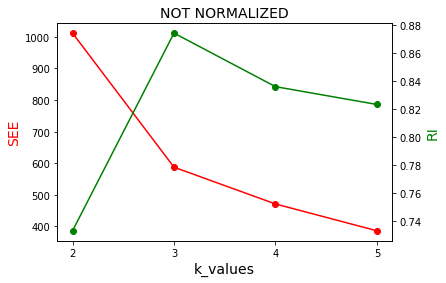

In [470]:
# QUESTION 1: NOT NORMALIZED PLOT

plotQ1(_not_normalized, 'NOT NORMALIZED')

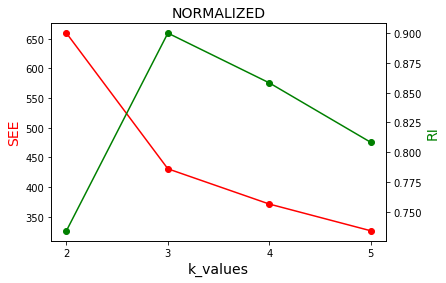

In [471]:
# QUESTION 1: PLOT NORMALIZED

plotQ1(_normalized, 'NORMALIZED')

In [472]:
# QUESTION 2: SET UP DATAFRAMED

df = pd.read_csv(
    '../assignment/question_2_data/cleaned_data.csv', 
    sep=','
)
df.head()

,all_crime,violent_crime,police_funding,over_25_hs,under_19_no_hs,college_students,over_25_college
0,478,184,40,74,11,31,20
1,494,213,32,72,11,43,18
2,643,347,57,70,18,16,16
3,341,565,31,71,11,25,19
4,773,327,67,72,9,29,24


In [473]:
scaled_df = pd.DataFrame(scale(df))
scaled_df.columns = df.columns

In [474]:
# QUESTION 2: LINEAR PREDICTION FUNCTION
# code below is a modified version of code from Regression Modeling Slide Deck, Slide 19

def q2(x, y, learn_rate, iterations):
    _x0 = np.ones((len(x), 1))
    X = np.hstack((_x0, x))
    w = np.random.randn(X.shape[1])
    result = []
    _loss = 0
    for _t in range(iterations):
        _y_pred = X.dot(w)
        _loss = np.square(_y_pred - y).sum()
        result.append(_loss)
        _grad_y_pred = 2.0 * (_y_pred - y)
        _grad_w = X.T.dot(_grad_y_pred)
        w -= learn_rate * _grad_w
    return w, result

In [475]:
# QUESTION 2: PREDICT FUNCTION

def q2predict(x, w):
    _x0 = np.ones((len(x), 1))
    X = np.hstack((_x0, x))
    return X.dot(w)
    

In [476]:
# QUESTION 2: TEST LOOP

_features = ['police_funding', 'over_25_hs', 'under_19_no_hs', 'college_students', 'over_25_college']
_x = scaled_df[_features]
_y = scaled_df['violent_crime']
_learning_rates = [1e-3, 1E-4, 1e-5]
_iteration_list = [1_000]
_test_rates = []
_test_iterations = []
_ellapsed_times = []
_w_list = []
_error_list = []
_mse_list=[]

for _rate in _learning_rates:
    for _iterations in _iteration_list:
        print('Testing learining rate {} with {} iterations.'.format(_rate, _iterations))
        if _rate == 1e-5: _iterations = 10_000
        start_time = time()
        _w, _error = q2(_x, _y, _rate, _iterations)
        stop_time = time()
        _test_rates.append(_rate)
        _test_iterations.append(_iterations)
        _ellapsed_times.append(stop_time - start_time)
        _w_list.append(_w)
        _error_list.append(_error)
        _mse_list.append(mean_squared_error(_y, q2predict(_x, _w)))

_result = {
    'learning_rates': _test_rates,
    'iteration_list': _test_iterations,
    'ellapsed_time': _ellapsed_times,
    'mse': _mse_list,
    'w': _w_list,
    'error': _error_list
}
        
result = pd.DataFrame(_result)



Testing learining rate 0.001 with 1000 iterations.
Testing learining rate 0.0001 with 1000 iterations.
Testing learining rate 1e-05 with 1000 iterations.


In [477]:
# QUESTION 2: SAVE RESULTS

result.to_csv('result.csv')

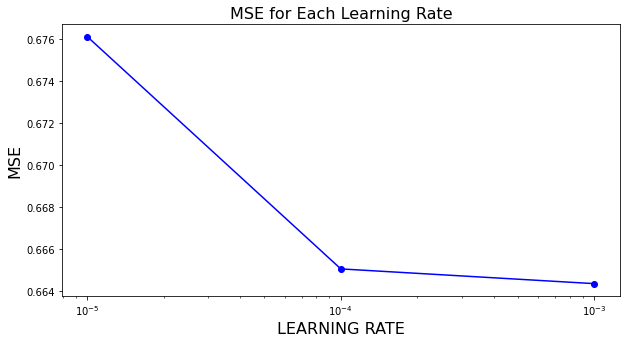

In [478]:
# QUESTION 2: MSE PLOT

_x = result['learning_rates']
_y = result['mse']
plt.figure(figsize=(10,5))
plt.plot(
    _x,
    _y,
    'b-',
    marker='o'
)
# for _lr, _et, _it in zip(_x,_y, result['iteration_list']):
#     label = '{:,} iterations'.format(_it)
#     plt.annotate(
#         text=label,
#         xy=(_lr,_et),
#         xytext=(5,2),
#         textcoords=('offset pixels')
#     )
plt.xscale('log')
plt.ylabel('MSE', fontsize=16)
plt.xlabel('LEARNING RATE', fontsize=16)
plt.xticks(_x)
plt.title('MSE for Each Learning Rate', fontsize=16)
plt.show()

In [479]:
# QUESTION 2: ERROR VS ITERATION PLOT FUNCTION

def q2ErrorPlot(test):
    _x = np.arange(len(result.iloc[test,5]))
    _y = result.iloc[test,5]
    plt.figure(figsize=(10,5))
    plt.plot(
        _x,
        _y,
        'b-',
    )
    plt.xscale('log')
    plt.ylabel('ERROR', fontsize=16)
    plt.xlabel('ITERATION', fontsize=16)
    plt.title('Error Evolution in {:,} Iterations with Learning Rate of {}'.format(result.iloc[test,1], result.iloc[test,0]), fontsize=16)
    plt.show()

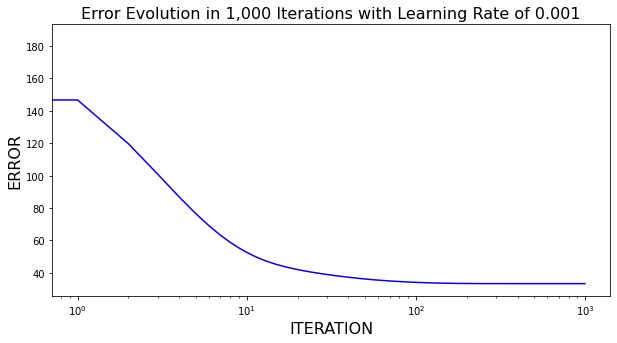

In [480]:
# QUESTION 2: PLOT LEARNING RATE 0.1, ITERATIONS 1,000

q2ErrorPlot(0)

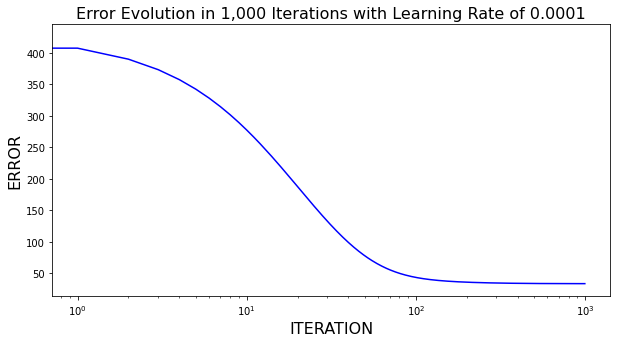

In [481]:
# QUESTION 2: PLOT LEARNING RATE 0.01, ITERATIONS 1,000

q2ErrorPlot(1)

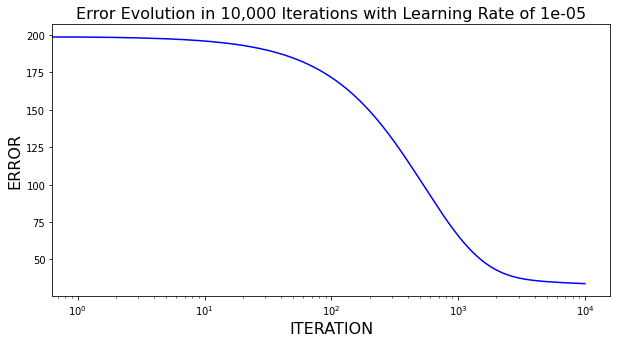

In [482]:
# QUESTION 2: PLOT LEARNING RATE 0.001, ITERATIONS 1,000

q2ErrorPlot(2)

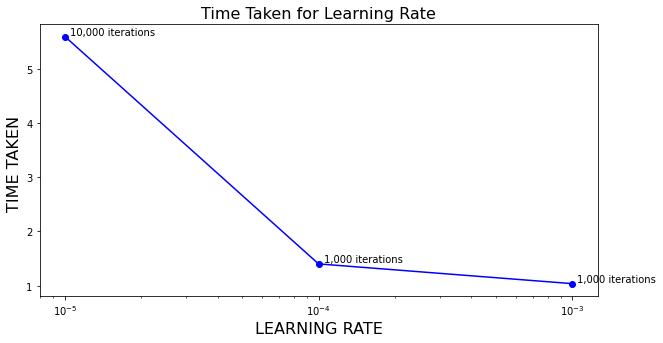

In [483]:
# QUESTION 2: TIME TAKEN FOR EACH TEST

_x = result['learning_rates']
_y = result['ellapsed_time']
plt.figure(figsize=(10,5))
plt.plot(
    _x,
    _y,
    'b-',
    marker='o'
)
for _lr, _et, _it in zip(_x,_y, result['iteration_list']):
    label = '{:,} iterations'.format(_it)
    plt.annotate(
        text=label,
        xy=(_lr,_et),
        xytext=(5,2),
        textcoords=('offset pixels')
    )
plt.xscale('log')
plt.ylabel('TIME TAKEN ', fontsize=16)
plt.xlabel('LEARNING RATE', fontsize=16)
plt.xticks(_x)
plt.title('Time Taken for Learning Rate', fontsize=16)
plt.show()

In [562]:
# QUESTIN 3: SETUP COUNT DATAFRAME
# put all questio 3 cells into a loop if there is time

A = 'A'
B = 'B'
C = 'C'
D = 'D'
E = 'E'
_items_bought_list = [
    {A, B, D, E},
    {B, C, D},
    {A, B, D, E},
    {A, C, D, E},
    {B, C, D, E},
    {B, D, E},
    {C, D},
    {A, B, C},
    {A, D, E},
    {B, D},
]

_tid_df_list = []
_items_df_list = []
for _i,_row in enumerate(_items_bought_list):
    for _item in _row:
        _tid_df_list.append(_i+1)
        _items_df_list.append(_item)
_df_data = {
    'TID': _tid_df_list,
    'items': _items_df_list
}
_count_df = pd.DataFrame(_df_data)

In [563]:
# QUESTION 3: SET UP SET DATAFRAME

A = 'A'
B = 'B'
C = 'C'
D = 'D'
E = 'E'
_items_bought_list = [
    {A, B, D, E},
    {B, C, D},
    {A, B, D, E},
    {A, C, D, E},
    {B, C, D, E},
    {B, D, E},
    {C, D},
    {A, B, C},
    {A, D, E},
    {B, D},
]
_tid_list = np.arange(len(_items_bought_list)) + 1
_df_data = {
    'TID': _tid_list,
    'items': _items_bought_list
}
_set_df = pd.DataFrame(_df_data)
_set_df

,TID,items
0,1,"{A, B, D, E}"
1,2,"{C, B, D}"
2,3,"{A, B, D, E}"
3,4,"{A, C, D, E}"
4,5,"{C, B, D, E}"
5,6,"{B, D, E}"
6,7,"{C, D}"
7,8,"{A, C, B}"
8,9,"{A, D, E}"
9,10,"{B, D}"


In [564]:
# QUESTION 3: INITIAL COUNTS
_min_support = 2
_c = _count_df['items'].value_counts()
_c
_l = _c[_c >= _min_support]
_l

D    9
B    7
E    6
A    5
C    5
Name: items, dtype: int64

In [565]:
# QUESTION 3: INITIAL COMBINATIONS
_comb = []
_keys = _l.keys()
_len = len(_keys)
for _i in range(_len):
    for _j in range(_i+1, _len):
        _comb.append({_keys[_i], _keys[_j]})

In [566]:
# QUESTION 3: COUNT OCCURANCES

_count_list = []
for _comb_row in _comb:
    _count = 0
    for _df_row in _set_df.iterrows():
        if _comb_row.issubset(_df_row[1][1]):
            _count += 1
    _count_list.append(_count)

In [567]:
# QUESTION 3: SAVE TO DF FOR LOW COUNT REMOVAL

_df_data = {'combinations': _comb, 'occurances': _count_list}
_df = pd.DataFrame(_df_data)

In [568]:
# QUESTION 3: LOW COUNT REMOVAL

_df = _df[_df['occurances'] >= 3]
_df

,combinations,occurances
0,"{B, D}",6
1,"{D, E}",6
2,"{A, D}",4
3,"{C, D}",4
4,"{B, E}",4
5,"{A, B}",3
6,"{C, B}",3
7,"{A, E}",4


In [569]:
# QUESTION 3: NEW COMBINATIONS

_n = []
_combs = _df['combinations']
_len = len(_combs)
for _i in range(_len):
    for _j in range(_i+1,_len):
        _n.append(_combs[_i].union(_combs[_j]))
_comb = []
[_comb.append(x) for x in _n if x not in _comb]
_comb


[{'B', 'D', 'E'},
 {'A', 'B', 'D'},
 {'B', 'C', 'D'},
 {'A', 'B', 'D', 'E'},
 {'A', 'D', 'E'},
 {'C', 'D', 'E'},
 {'B', 'C', 'D', 'E'},
 {'A', 'C', 'D'},
 {'A', 'B', 'C', 'D'},
 {'A', 'C', 'D', 'E'},
 {'A', 'B', 'E'},
 {'B', 'C', 'E'},
 {'A', 'B', 'C'},
 {'A', 'B', 'C', 'E'}]

In [570]:
# QUESTION 3: COUNT OCCURANCES

_count_list = []
for _comb_row in _comb:
    _count = 0
    for _df_row in _set_df.iterrows():
        if _comb_row.issubset(_df_row[1][1]):
            _count += 1
    _count_list.append(_count)

In [571]:
# QUESTION 3: SAVE TO DF FOR LOW COUNT REMOVAL

_df_data = {'combinations': _comb, 'occurances': _count_list}
_df = pd.DataFrame(_df_data)

In [572]:
# QUESTION 3: FINAL ANSWER
_df = _df[_df['occurances'] >= 3]
_df

,combinations,occurances
0,"{B, D, E}",4
4,"{A, D, E}",4


In [ ]:
# QUESTION 4: